## 3-3. How to use QURI Parts
QURI Parts is an open source library suite for creating and executing quantum algorithms on various quantum computers and simulators. In this section, you will learn how to install and use basic functions provided by QURI Parts.


### Covered areas and components
1.<b>Core components:</b><br>`quri-parts-circuit`: Quantum circuit (Gate, circuit, noise etc.)<br>`quri-parts-core`: General components (Operator, state, estimator, sampler etc.)<br>2.<b>Platform (device/simulator) support:</b> <br><b>Quantum circuit simulators:</b><br>`quri-parts-qulacs`: Qulacs <br>`quri-parts-stim`: Stim <br>`quri-parts-itensor`: ITensor <br><b>Quantum platforms/SDKs:</b> <br>`quri-parts-braket`: Amazon Braket SDK <br>`quri-parts-cirq`: Cirq (Only circuit conversion is supported yet) <br>`quri-parts-qiskit`: Qiskit (Circuit conversion and execution are not supported yet) <br>3. <b>Intermediate representation support:</b><br>`quri-parts-openqasm`: OpenQASM 3.0 <br>`quri-parts-algo`: Algorithm (Ansatz, optimizer, error mitigation etc.)<br><b>Chemistry</b><br>`quri-parts-chem`: General concepts, Fermion-qubit mapping etc.<br><b>Library support:</b> <br>`quri-parts-openfermion` <br><br> <b>Installation of QURI Parts </b><br> QURI Parts requires Python 3.9.8 or later.
 Default installation only contains components not depending specific platforms (devices-simulators) or external libraries. You need to specify extras with square brackets to use those platforms and external libraries with QURI Parts:  Use `pip` to install QURI Parts:<br>

In [ ]:
## Default installation, no extras 
 pip install quri-parts 

## Use Qulacs, a quantum circuit simulator 
 pip install "quri-parts[qulacs]" 

## Use Amazon Braket SDK 
 pip install "quri-parts[braket]" 

## Use Qulacs and OpenFermion, a quantum chemistry library for quantum computers 
 pip install "quri-parts[qulacs,openfermion]" 


Currently available extras are as follows:
`qulacs`,`braket`,`qiskit`,`cirq`,`openfermion`,`stim`,`openqasm`,`itensor`

### Basic utilities of QURI Parts
Quantum gates and circuits are essential when working on quantum computing.<br>Here we describe basic treatment of them in QURI Parts.<br>QURI Parts modules used in this tutorial: `quri-parts-circuit`, `quri-parts-core` and `quri-parts-qulacs`. You can install them as follows: <br>

In [ ]:
 pip install "quri-parts[qulacs]" 


### QuantumGate object
In QURI Parts, a quantum gate is represented by a `QuantumGate` object (more precisely `NamedTuple`). A `QuantumGate` contains not only the kind of the gate but also some additional information such as gate parameters and qubits on which the gate acts. You can create gate objects using `QuantumGate`:

In [ ]:
from math import pi 
from quri_parts.circuit import QuantumGate 
gates = [ 
# X gate acting on qubit 0 <
 QuantumGate("X", target_indices=(0,)), 
 # Rotation gate acting on qubit 1 with angle pi/3 
 QuantumGate("RX", target_indices=(1,), params=(pi/3,)), 
 # CNOT gate on control qubit 2 and target qubit 1 
 QuantumGate("CNOT", target_indices=(1,), control_indices=(2,)) 
] 
for gate in gates: 
print(gate)

QuantumGate(name= X, target_indices=(0,), control_indices=(), params=(), pauli_ids=()) 
QuantumGate(name= RX, target_indices=(1,), control_indices=(), params=(1.0471975511965976,), pauli_ids=()) 
QuantumGate(name= CNOT, target_indices=(1,), control_indices=(2,), params=(), pauli_ids=()) 

However it is more convenient to use factory functions: 


In [2]:
##Import necessary modules
from quri_parts.circuit import X, RX, CNOT 
gates = [ 
#X gate acting on qubit 0 <
X(0), 
 # Rotation gate acting on qubit 1 with angle pi/3 
RX(1, pi/3), 
 # CNOT gate on control qubit 2 and target qubit 1 
CNOT(2, 1) 
] 

for gate in gates: 
print(gate)

QuantumGate(name= X, target_indices=(0,), control_indices=(), params=(), pauli_ids=()) 
QuantumGate(name= RX, target_indices=(1,), control_indices=(), params=(1.0471975511965976,), pauli_ids=()) 
QuantumGate(name= CNOT, target_indices=(1,), control_indices=(2,), params=(), pauli_ids=()) 

### QuantumCircuit object
You can construct a quantum circuit by specifying the number of qubits used in the circuit as follows:

In [3]:
from quri_parts.circuit import QuantumCircuit
 # Create a circuit for 3 qubits
 circuit = QuantumCircuit(3)
 # Add an already created QuantumGate object 
 circuit.add_gate(X(0))
 # Or use methods to add gates
 circuit.add_X_gate(0),
 circuit.add_RX_gate(1, pi/3) 
 circuit.add_CNOT_gate(2, 1) 
 circuit.add_PauliRotation_gate(target_qubits=(0, 1, 2), pauli_id_list=(1, 2, 3), angle=pi/3) 


A `QuantumCircuit` object has several properties:

In [4]:
print("Qubit count:", circuit.qubit_count) 
print("Circuit depth:", circuit.depth)

gates = circuit.gates # .gates returns the gates in the circuit as a sequence 
print("# of gates in the circuit:", len(gates))for gate in gates: 
print(gate)

Qubit count: 3
Circuit depth: 3 
# of gates in the circuit: 5 
QuantumGate(name= X, target_indices=(0,), control_indices=(), params=(), pauli_ids=()) 
QuantumGate(name= X, target_indices=(0,), control_indices=(), params=(), pauli_ids=()) 
QuantumGate(name= RX, target_indices=(1,), control_indices=(), params=(1.0471975511965976,), pauli_ids=())QuantumGate(name= CNOT, target_indices=(1,), control_indices=(2,), params=(), pauli_ids=())QuantumGate(name= PauliRotation, target_indices=(0, 1, 2), control_indices=(), params=(1.0471975511965976,), pauli_ids=(1, 2, 3))

`QuantumCircuit` objects with the same number of qubits can be combined and extended:

In [5]:
circuit2 = QuantumCircuit(3)
circuit2.add_Y_gate(1)
circuit2.add_H_gate(2)

combined = circuit + circuit2 # equivalent: combined = circuit.combine(circuit2) 
print("Combined circuit:", combined.gates) 

circuit2 += circuit # equivalent: circuit2.extend(circuit) 
print("Extended circuit:", circuit2.gates)


Combined circuit: (QuantumGate(name= X , target_indices=(0,), control_indices=(), params=(), pauli_ids=()), QuantumGate(name= X , target_indices=(0,), control_indices=(), params=(), pauli_ids=()), QuantumGate(name= RX, target_indices=(1,), control_indices=(), params=(1.0471975511965976,), pauli_ids=()), QuantumGate(name= CNOT, target_indices=(1,), control_indices=(2,), params=(), pauli_ids=()), QuantumGate(name= PauliRotation, target_indices=(0, 1, 2), control_indices=(), params=(1.0471975511965976,), pauli_ids=(1, 2, 3)), QuantumGate(name='Y', target_indices=(1,), control_indices=(), params=(), pauli_ids=()), QuantumGate(name= H, target_indices=(2,), control_indices=(), params=(), pauli_ids=()))
Extended circuit: (QuantumGate(name= Y, target_indices=(1,), control_indices=(), params=(), pauli_ids=()), QuantumGate(name= H, target_indices=(2,), control_indices=(), params=(), pauli_ids=()), QuantumGate(name= X, target_indices=(0,), control_indices=(), params=(), pauli_ids=()), QuantumGate

Since the generated state is $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$, we can see that the probability of getting $|00\rangle$ and $|11\rangle$ are both close to 50% as shown in the formula. Next, let's look at the results from the actual machine. Note that it takes a very long time to obtain the results of the experiment on the actual machine.

{'00': 1844, '11': 2041, '01': 107, '10': 104}


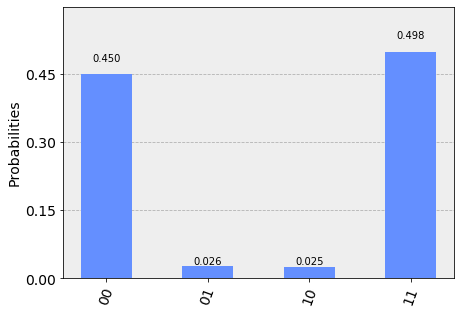

In [6]:
#Select the backend that was least busy
backend_sim = backend_lb

#Execute quantum circuit qc 4096 times with the specified backend (backend_sim).
result = execute(qc, backend_sim, shots=4096).result()

#Output the results.
print(result.get_counts(qc))

#Draw a histogram of the results.
plot_histogram(result.get_counts(qc))

The results from the actual machine show that $|01\rangle$ and $|10\rangle$, which cannot be obtained theoretically, are obtained. This is due to an error in the calculation process. This result clearly shows that today's quantum computers are called NISQ devices (medium-scale quantum computers that allow the generation of noise).

### Reference

[1] https://quantumexperience.ng.bluemix.net/qx/experience [online] ( 2019-02-13)